In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
climate_data = pd.read_csv('bomregions2012.csv')
climate_df = pd.DataFrame(climate_data[['Year','auRain','SOI','CO2','sunspot','auAVt']])
climate_df.columns = ['Year','Rain','SOI','CO2','sunspot','Temperature']
climate_df

,Year,Rain,SOI,CO2,sunspot,Temperature
0,1900,373.38,-5.550000,296.26,9.5,NaN
1,1901,406.65,0.991667,296.56,2.7,NaN
2,1902,314.46,0.458333,296.96,5.0,NaN
3,1903,526.58,4.933333,297.26,24.4,NaN
4,1904,513.16,4.350000,297.66,42.0,NaN
...,...,...,...,...,...,...
108,2008,478.69,10.166667,385.59,2.9,22.15
109,2009,460.81,-0.191667,387.37,3.1,22.62
110,2010,703.36,9.825000,389.85,16.5,22.01
111,2011,707.73,13.300000,391.62,55.7,21.68


In [15]:
climate_df = climate_df.dropna()
climate_df

,Year,Rain,SOI,CO2,sunspot,Temperature
10,1910,539.69,12.733333,300.16,18.6,21.40
11,1911,424.31,-5.333333,300.56,5.7,21.24
12,1912,370.62,-8.483333,300.86,3.6,21.72
13,1913,436.90,-6.033333,301.26,1.4,21.07
14,1914,419.74,-7.925000,301.56,9.6,22.03
...,...,...,...,...,...,...
108,2008,478.69,10.166667,385.59,2.9,22.15
109,2009,460.81,-0.191667,387.37,3.1,22.62
110,2010,703.36,9.825000,389.85,16.5,22.01
111,2011,707.73,13.300000,391.62,55.7,21.68


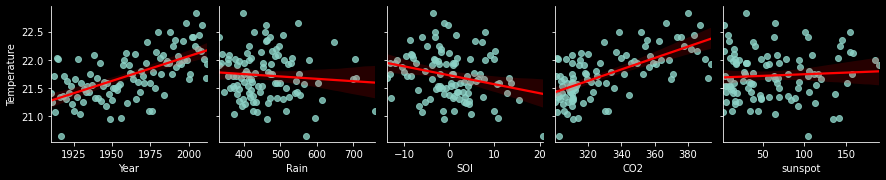

In [4]:
plt.style.use('dark_background')
sns.pairplot(data=climate_df, y_vars=['Temperature'], x_vars=['Year','Rain','SOI','CO2','sunspot'], kind="reg", plot_kws={'line_kws':{'color':'red'}})

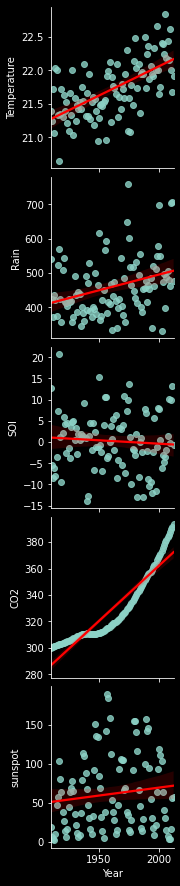

In [17]:
sns.pairplot(data=climate_df, x_vars=['Year'], y_vars=['Temperature','Rain','SOI','CO2','sunspot'], kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [18]:
X = climate_df.drop('Temperature', axis=1)
y = climate_df['Temperature'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(72, 5) (72,) (31, 5) (31,)


In [7]:
ln = LinearRegression().fit(X_train, y_train)
ln_pred_train = ln.predict(X_train)
ln_pred_test = ln.predict(X_test)

In [8]:
las = Lasso().fit(X_train,y_train)
las_pred_train = las.predict(X_train)
las_pred_test = las.predict(X_test)

In [9]:
rid = Ridge().fit(X_train,y_train)
rid_pred_train = rid.predict(X_train)
rid_pred_test = rid.predict(X_test)

In [10]:
br = BayesianRidge().fit(X_train, y_train)
br_pred_train = br.predict(X_train)
br_pred_test = br.predict(X_test)

In [11]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
tree_pred_train = tree.predict(X_train)
tree_pred_test = tree.predict(X_test)

In [12]:
forest = RandomForestRegressor().fit(X_train,y_train)
forest_pred_train = forest.predict(X_train)
forest_pred_test = forest.predict(X_test)

In [13]:
print("Linear Regresion:\nTraining MSE:",mean_squared_error(y_train,ln_pred_train),"\nTesting MSE:",mean_squared_error(y_test,ln_pred_test))
print("\nLasso Regresson:\nTraining MSE:",mean_squared_error(y_train,las_pred_train),"\nTesting MSE:",mean_squared_error(y_test,las_pred_test))
print("\nRidge Regresson:\nTraining MSE:",mean_squared_error(y_train,rid_pred_train),"\nTesting MSE:",mean_squared_error(y_test,rid_pred_test))
print("\nBayesian Ridge Regresson:\nTraining MSE:",mean_squared_error(y_train,br_pred_train),"\nTesting MSE:",mean_squared_error(y_test,br_pred_test))
print("\nDecision Tree Regresson:\nTraining MSE:",mean_squared_error(y_train,tree_pred_train),"\nTesting MSE:",mean_squared_error(y_test,tree_pred_test))
print("\nRandom Forest Regresson:\nTraining MSE:",mean_squared_error(y_train,forest_pred_train),"\nTesting MSE:",mean_squared_error(y_test,forest_pred_test))

Linear Regresion:
Training MSE: 0.0921374190084253 
Testing MSE: 0.06258938785271709

Lasso Regresson:
Training MSE: 0.09507414251387379 
Testing MSE: 0.05907172616925512

Ridge Regresson:
Training MSE: 0.09213741922676236 
Testing MSE: 0.06259001142693273

Bayesian Ridge Regresson:
Training MSE: 0.09294223419879742 
Testing MSE: 0.06330660842723049

Decision Tree Regresson:
Training MSE: 0.0 
Testing MSE: 0.1765451612903231

Random Forest Regresson:
Training MSE: 0.018728026527778267 
Testing MSE: 0.07757629967742039
